In [107]:
import numpy as np
from scipy.constants import g, pi
import matplotlib.pyplot as plt

In [108]:
%matplotlib notebook

In [109]:
A_ = 0
u0 = 1400
alpha = pi/4
t = np.linspace(0, 2*u0*np.sin(alpha)/g, 1000)
D = u0**2*np.sin(2*alpha)/g
C = 0.75*(D-A_)

In [110]:
2*u0*np.sin(alpha)/g

201.89350974311648

In [111]:
x = lambda t, alpha1=alpha, x0=0, u0=u0: x0 + u0*np.cos(alpha1)*t
y = lambda t, alpha1=alpha, y0=0, u0=u0: y0 + u0*np.sin(alpha1)*t - (g*t**2)/2

<IPython.core.display.Javascript object>


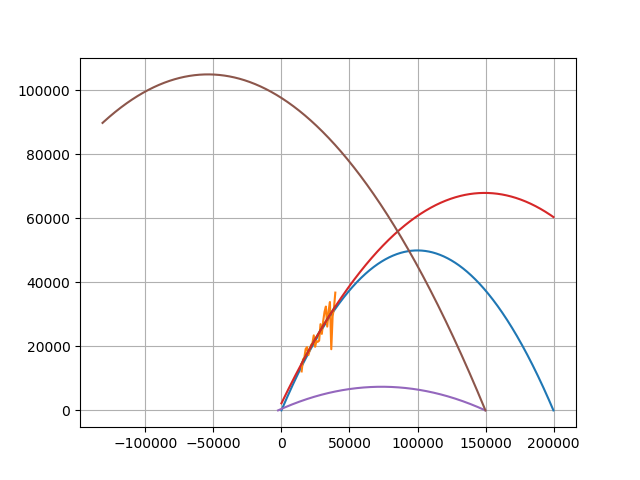

In [112]:
plt.figure()
plt.plot(x(t),y(t))
plt.grid()

In [113]:
err = 0.1
T0 = 40
te = np.linspace(15,T0,26)
xe = x(te)
ye = y(te)*(1+err*(np.random.randn(26)))

In [114]:
plt.plot(xe, ye)

In [115]:
A = np.matrix([xe**2,xe,np.ones(26)]).T
koef = np.linalg.lstsq(A, ye,rcond=None)[0]
koef = np.matrix(koef).T
plt.plot(xe, A*koef)
plt.plot(x(t), np.matrix([x(t)**2,x(t),np.ones(t.shape[0])]).T*koef)

In [116]:
x0 = (-koef[1,0] + np.sqrt(koef[1,0]**2-4*koef[0,0]*koef[2,0]))/(2*koef[0,0])

In [117]:
x0, (C-x0), C

(-2489.1405116577052, 152387.42381941315, 149898.28330775545)

In [118]:
u0_ = 2000
alpha_ = np.arcsin((C-x0)*g/(u0_**2))/2

In [119]:
plt.plot(x(t,alpha_,C,-u0_)[y(t,alpha_,0,u0_)>-10],y(t,alpha_,0,u0_)[y(t,alpha_,0,u0_)>-10])

In [120]:
f = lambda t: (x(t[0])-x(t[0]-T0, t[1], C, -1*u0_))**2+\
    (koef[0,0]*(x(t[0])**2)+koef[1,0]*x(t[0])+koef[2,0] -y(t[0]-T0, t[1], 0, u0_))**2 + t[0]

In [121]:
from scipy.optimize import minimize

In [122]:
c = minimize(f,[T0,pi/4],bounds=[(T0, 2*u0*np.sin(alpha)/g), (0, pi/2)])['x']

In [123]:
 minimize(f,[T0,pi/4],bounds=[(T0, 2*u0*np.sin(alpha)/g), (0, pi/2)],tol=1e-15)

      fun: 86.27940511465943
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.32294736, 1.31766882])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 138
      nit: 8
   status: 0
  success: True
        x: array([86.2794047 ,  0.80000472])

In [124]:
plt.plot(x(t,c[1],C,-u0_), y(t,c[1],0,u0_))

In [125]:
x(c[0], alpha,0, u0), y(c[0], alpha, 0, u0)

(85412.25299576305, 48911.23643558145)

In [126]:
x(c[0]-T0, c[1], C, -u0_), y(c[0]-T0, c[1], 0, u0_)

(85412.2529861754, 55896.07027177869)

<IPython.core.display.Javascript object>


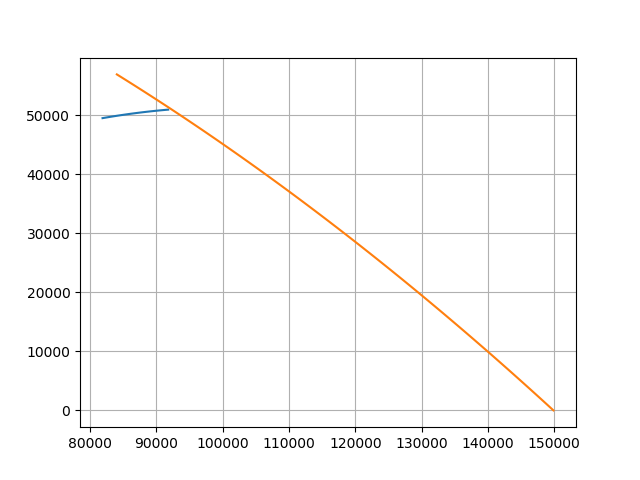

In [127]:
plt.figure()
plt.grid()
plt.plot(x(np.linspace(c[0]-5,c[0]+5,100), alpha, u0), y(np.linspace(c[0]-5,c[0]+5,100), alpha, u0))
plt.plot(x(np.linspace(T0,c[0]+1,100)-T0, c[1], C, -u0_), y(np.linspace(T0,c[0]+1,100)-T0, c[1], 0, u0_))